## Calculating the return on investment in S&P 500 stocks.
Hypothesis: The returns on investment taking into account, the uncertainity in market returns will be higher than the traditional calculation of returns

Completed:
Initial program draft .
Pending: 
Doc tests, doc strings and writing classes where appropriate

In [1]:
# 1.Import needed libraries, set plots to display in notebook

import numpy as np
from pandas import Series, DataFrame
%matplotlib inline
import matplotlib.pyplot as plots


In [2]:
# 2. Regular bank savings  approach for 30 year period.
# The average expected return for the stock is  0.7 which is taken as the interest rate. 


In [3]:
def calculate_savings ( ):
    """
    This function calculates the returns at the end of a given time period in the traditional savings bank approach.
    
    User Inputs:
    principal: The initial amount a user wants to invest at the beginning-->integer
    time Period: The time for which the user wants to know the returns with interest-->integer
    annual_add: The amount added to savings each year--> integer
    interest: Rate of interest for savings bank. --> float.
    Note: If you would like to compare returns from bank and a particular stock ,
    please use the stock's average expected returns as the rate of interest for bank.
    
    
    Returned values: A dictionary with keys p,t, aa for principal. time period and annual additions--> Dictionary
    
    """        
    
    principal = int(input ("Please enter the initial amount you want to invest:  "))
     time_period = int(input ("Please enter the time period you want to calculate returns for:  "))
     annual_add = int(input ("Please enter the amount to be added every year, if none, enter 0:  "))  
     interest = float(input ("Please enter the interest rate in percentage. Note : If you would like to compare with S&P stock returns, The average s&p returns rate is 7%:  "))
     for year in range(time_period):
            ending = (principal) * (1+interest/100) + annual_add
            print((ending))
            principal = ending
     
     return({'p':principal,'t':time_period, 'aa':annual_add})
    

     

     
    



In [4]:
# Calling function and saving it's result in a variable
savings=calculate_savings()
print( savings)




Please enter the initial amount you want to invest:  10000
Please enter the time period you want to calculate returns for:  30
Please enter the amount to be added every year, if none, enter 0:  10000
Please enter the interest rate in percentage. Note : If you would like to compare with S&P stock returns, The average s&p returns rate is 7%:  7
20700.0
32149.0
44399.43
57507.390100000004
71532.907407
86540.21092549001
102598.02569027431
119779.88748859352
138164.47961279508
157835.99318569075
178884.51270868912
201406.42859829735
225504.87860017817
251290.22010219065
278880.535509344
308402.1729949981
339990.325104648
373789.6478619734
409954.9232123115
448651.76783717336
490057.39158577553
534361.4089967798
581766.7076265544
632490.3771604133
686764.7035616423
744838.2328109574
806976.9091077244
873465.2927452652
944607.8632374338
1020730.4136640542
{'p': 1020730.4136640542, 't': 30, 'aa': 10000}


In [5]:
def stock_returns(expected_return,volatality,initial):
    """
    Calculates returns from a particular stock based on the time period,  annual additions and  principal amount specified
    for savings approach.
    
    Argument list:
    expected_return: Average expected return for the stock
    volatality: Average volatality of the stock, i.e variance of the expected returns 
    initial: Initial amount being invested.
    
    """
    print("\tReturn", "\t\tEnding Value".rjust(18))
    for year in range(savings['t']):
            market_return = np.random.normal(expected_return, volatality)
            fv = initial * (1 + market_return) + savings['aa']
            print("\t{}".ljust(10).format(round(market_return,4)), "\t{}".rjust(10).format(fv))
            initial = fv




In [6]:
stock_returns(0.07,.14,10000)


	Return     		Ending Value
	0.0455               	20454.81540724602
	0.2599               	35770.91697179779
	0.26               	55071.405584836015
	-0.0497               	62333.247812605456
	0.0094               	72919.00619825005
	0.1518               	93991.55018618758
	0.0397               	107721.78198784802
	-0.0162               	115978.54233230503
	0.3082               	161722.26426705526
	0.3655               	230823.78136462046
	0.1737               	280926.5613122582
	0.1006               	319190.86572978727
	0.2032               	394056.45740280376
	-0.2881               	290510.5315660565
	0.1813               	353177.85036623763
	-0.1123               	323503.211282903
	0.0745               	357611.8247055556
	0.0471               	384461.574364174
	0.2004               	471507.7397806343
	0.1428               	548852.3627258498
	0.06               	591807.8199442
	0.2336               	740061.6323689303
	0.0212               	765727.516048379
	-0.2757               	564

## Average volatility is 14.4%


In [7]:
# 4. Simulate portfolio ending market values 

"""
Uses Monte Carlo simulation to simulate the stock returns over the given time period

Argument list:
expected_ return: Average expected return for the stock
volatality: Average volatality of the stock, i.e variance of the expected returns 
iterations: Number of independent trials to be conducted for calculating expected returns
add: Annual additions to each years starting maount.    
    
"""
def simulations(iterations, expected_return, volatility, add):
 sim = DataFrame()
 
 for x in range(iterations):
        stream = []
        initial= savings['p']
        for i in range(savings['t']):
          end = round(initial * (1 + np.random.normal(expected_return,volatility)) + add,2)
          stream.append(end)
          initial= end
        sim[x] = stream
 return(sim)
    

In [8]:
simulated=simulations(5000, 0.07, .14, 10000)


In [9]:
# 5. Sample first five streams of annual ending values
first_five = list(range(5))
simulated[first_five]


,0,1,2,3,4
0,1085076.25,872705.40,1205565.47,1231629.01,1127170.23
1,1297526.30,950091.96,1446622.46,1213357.51,1331687.56
2,1632908.55,1054345.66,1476040.27,1385761.73,1606548.65
3,1582922.20,1104466.40,1358897.01,1206628.90,1454186.94
4,1929564.75,1239147.45,1408728.35,1193792.66,1294015.10
5,2186958.53,1425427.45,1671144.44,1191811.69,1287773.25
6,2550283.91,1483942.11,1299526.84,1377335.94,1409038.38
7,2987456.40,1920992.92,1518250.36,1292724.45,1644639.84
8,2955870.61,1855884.59,1333944.41,1439093.72,1658345.32
9,2885906.20,1628524.64,1418562.34,1623999.62,1610559.00


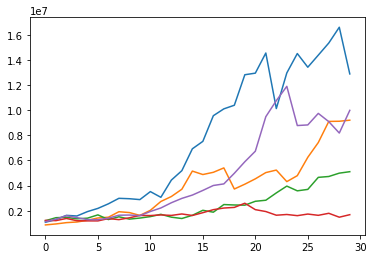

In [10]:
# 6. Plot first five simulated portfolios
plots.plot(simulated[first_five])


In [11]:
# 7. Generate summary statistics with numpy functions

print("Count:", len(simulated.loc[29]))
print("Mean: ", (np.mean(simulated.loc[29])))
print("SD: ",(np.std(simulated.loc[29])))
print("Max: ",(np.max(simulated.loc[29])))
print("Min: ", (np.min(simulated.loc[29])))



Count: 5000
Mean:  8860658.162950004
SD:  7114524.5421162145
Max:  121307424.52
Min:  696536.78


In [12]:
# 8. Generating more comprehensive summary statistics with pandas describe function
ending_values = simulated.loc[29]
ending_values.describe()


count    5.000000e+03
mean     8.860658e+06
std      7.115236e+06
min      6.965368e+05
25%      4.333845e+06
50%      6.949714e+06
75%      1.108616e+07
max      1.213074e+08
Name: 29, dtype: float64

(array([ 154.,  491.,  593.,  601.,  565.,  477.,  402.,  301.,  249.,
         219.,  158.,  124.,  118.,   78.,   85.,   60.,   58.,   37.,
          33.,   34.,   16.,   18.,   13.,   24.,   18.,    6.,   13.,
           9.,    7.,    4.,    3.,    2.,    3.,    2.,    1.,    2.,
           4.,    2.,    1.,    0.,    0.,    2.,    1.,    0.,    1.,
           1.,    2.,    1.,    0.,    0.,    0.,    0.,    2.,    1.,
           0.,    1.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.]),
 array([  6.96536780e+05,   1.90264566e+06,   3.10875453e+06,
          4.31486341e+06,   5.52097229e+06,   6.72708117e+06,
          7.93319004e+06,   9.13929892e+06,   1.03454078e+07,
          1.15515167e+07

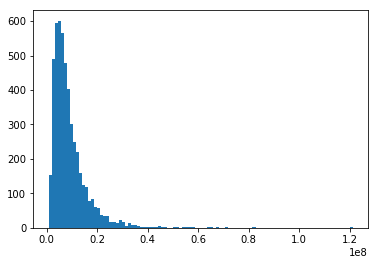

In [13]:
# 9. Get a visualization of the distribution of ending values

plots.hist(ending_values, bins=100)


In [16]:
# 11. Calculate probability of seeing an ending value more  than savings

len(ending_values[ending_values>savings['p']])*100 / len(ending_values)


99.68